# Introduction to Epidemic Modeling
Nicola Perra
n.perra@greenwich.ac.uk

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.random
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Epidemic Model: homogenous mixing

### SI model

In [2]:
# let's write a simple function that describes one time step of the model
def SI_hm(beta,N,status):
    p_1=0.
    delta_1=0.
    
    # status[1] = number of susceptible
    # status[2] = number of infected
    
    # force of infection
    p_1=beta*float(status[2])/N  ## P(S-->I) 

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[1], p_1)

    # update the compartments
    status[1]-= delta_1
    status[2]+= delta_1
    
    return 0




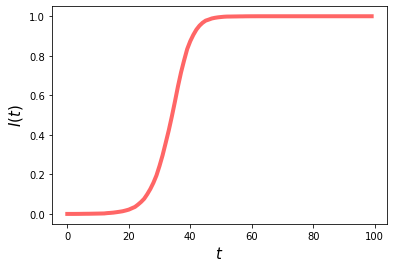

In [3]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.3  # transmission rate

# let's call status the vector such that
# status[1] = S
# status[2] = I 

status=np.zeros(3,float) # initially all zero
# initial conditions
status[1]=N-1
status[2]=1 # index case

it=[] # list of the number of I as function of time

for t in range(t_max):
    # let's call the function until t=tmax
    SI_hm(beta,N,status)
    # this is the number of infected people
    it.append(status[2]/N)
    
    

plt.plot(it,linewidth=4, color='Red', alpha=0.6)

plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [4]:
# what we did above is only one simulation
# we need to run many stochastic realizations
# so let's change the function a bit
# in particular let create matrix of size ite_max X 3 to keep run the model ite_max times
# and save each run

def SI_hm(beta,N,status,ite):
    p_1=0.
    delta_1=0.
    p_1=beta*float(status[ite,2])/N  ## P(S-->I) 

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[ite,1], p_1)

    # update the compartments
    status[ite,1]-= delta_1
    status[ite,2]+= delta_1
    
    return 0

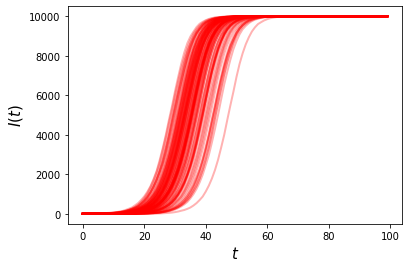

In [5]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.3
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-1
    status[ite,2]=1

    it=[]
    for t in range(t_max):
        # let's call the function until t=tmax
        SI_hm(beta,N,status,ite)
        it.append(status[ite,2])
        
    plt.plot(it,linewidth=2, color='Red', alpha=0.3)

plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

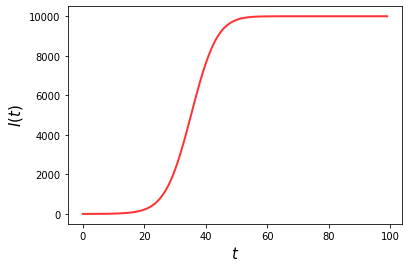

In [6]:
# we can get a single curve, by averaging for each time

N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.3
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is where we average the values for each time
ave=np.zeros(t_max,float)

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-1
    status[ite,2]=1

    for t in range(t_max):
        # let's call the function until t=tmax
        SI_hm(beta,N,status,ite)
        
        ave[t]+=status[ite,2]/ite_max # we sum all the values at time t and average
        
plt.plot(ave,linewidth=2, color='Red', alpha=0.8)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [7]:
# it is however better to compute the median and reference ranges
# rather the average, this allows us to uncover the most likely value

from median_fun import* # this a very simple function I wrote to get the median from a list


N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.3
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-1
    status[ite,2]=1

    for t in range(t_max):
        # let's call the function until t=tmax
        SI_hm(beta,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

ModuleNotFoundError: ignored

In [8]:
# what happens if beta is much smaller?

N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.03
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-1
    status[ite,2]=1

    for t in range(t_max):
        # let's call the function until t=tmax
        SI_hm(beta,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

IndexError: ignored

In [ ]:
# the disease will eventually spread, it takes just more time!

### SIS model

In [ ]:
# simple variation of the previous function
def SIS_hm(beta,mu,N,status,ite):
    p_1=0.
    delta_1=0.
    delta_2=0.
    
    p_1=beta*float(status[ite,2])/N  ## P(S-->I) 
    p_2=mu                      ## P(I--->S)       

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[ite,1], p_1)
        
    if status[ite,2]!=0:
        delta_2=binomial(status[ite,2],p_2)

    # update the compartments
    status[ite,1]-= delta_1
    status[ite,1]+= delta_2
    
    status[ite,2]+= delta_1
    status[ite,2]-= delta_2
    
    return 0


# from the theory
def i_inf(t,beta,mu):
    R0=beta/mu
    return 1.-1./R0


In [ ]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.3
mu=0.1
# R0= beta/mu
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-1
    status[ite,2]=1

    for t in range(t_max):
        # let's call the function until t=tmax
        SIS_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
    
x=np.zeros(t_max,int)
y=np.zeros(t_max,float)
for i in range(t_max):
    x[i]=i
    y[i]=N*i_inf(float(i),beta,mu)
    
# from the theory!
plt.plot(x,y,linewidth=4, color='Black', alpha=0.6)
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [ ]:
# why such a big RR?
# we start with only one seed!
# what happens if we start with 10 instead?

In [ ]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.5
mu=0.1
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-5
    status[ite,2]=5

    for t in range(t_max):
        # let's call the function until t=tmax
        SIS_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [ ]:
# why? as we saw in the lecture about metapopulation stochastic extintion are function of R0 and the number of seeds

In [ ]:
# below the threshold?

N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.5
mu=0.6
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-100
    status[ite,2]=100

    for t in range(t_max):
        # let's call the function until t=tmax
        SIS_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [ ]:
# at the threshold?
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.5
mu=0.5
ite_max=100 # number of realizations



status=np.zeros((ite_max, 3),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-10
    status[ite,2]=10

    for t in range(t_max):
        # let's call the function until t=tmax
        SIS_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

### SIR model

In [ ]:
def SIR_hm(beta,mu,N,status,ite):
    p_1=0.
    delta_1=0.
    delta_2=0.
    
    p_1=beta*float(status[ite,2])/N  ## P(S-->I) 
    p_2=mu                      ## P(I--->R)       

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[ite,1], p_1)
        
    if status[ite,2]!=0:
        delta_2=binomial(status[ite,2],p_2)

    # update the compartments
    status[ite,1]-= delta_1

    status[ite,2]+= delta_1
    status[ite,2]-= delta_2
    
    status[ite,3]+= delta_2 # R is id=3
    
    return 0

# from the theory value of i_peak
def i_peak(t,beta,mu):
    R0=beta/mu
    return 1.-(1./R0)*(1+math.log(R0))

In [ ]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.6
mu=0.2
ite_max=100 # number of realizations



status=np.zeros((ite_max, 4),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-10
    status[ite,2]=10

    for t in range(t_max):
        # let's call the function until t=tmax
        SIR_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
x=np.zeros(t_max,int)
y=np.zeros(t_max,float)
for i in range(t_max):
    x[i]=i
    y[i]=N*i_peak(float(i),beta,mu)
    
plt.plot(x,y,linewidth=2, color='Black', alpha=0.8)
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [ ]:
# what happens if R0 increases?
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.9
mu=0.2
ite_max=100 # number of realizations



status=np.zeros((ite_max, 4),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-10
    status[ite,2]=10

    for t in range(t_max):
        # let's call the function until t=tmax
        SIR_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it2=[]
it_up2=[]
it_down2=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it2.append(med[0][0]) # this is the median
    x.append(t)
    it_up2.append(med[0][3]) # this is the 95% RR upper bound
    it_down2.append(med[0][4]) # this is the 95% RR lower bound
    

plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)

plt.plot(it2,linewidth=2, color='Blue', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up2, it_down2, where=it_up2 >= it_down2, facecolor="Blue", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

In [ ]:
# what about R?

N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.5
mu=0.2
ite_max=100 # number of realizations



status=np.zeros((ite_max, 4),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-10
    status[ite,2]=10

    for t in range(t_max):
        # let's call the function until t=tmax
        SIR_hm(beta,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,3])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Black', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Black", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

### SLIR model

In [ ]:
def SLIR_hm(beta,eps,mu,N,status,ite):
    p_1=0.
    delta_1=0.
    delta_2=0.
    delta_3=0.
    
    #status[1] = S
    #status[2] = I
    #status[3] = L
    #status[4] = R
    
    p_1=beta*float(status[ite,2])/N  ## P(S-->L) 
    p_2=mu                          ## P(I--->R)  
    p_3=eps                         ## P(L-->I)  

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[ite,1], p_1)
        
    if status[ite,2]!=0:
        delta_2=binomial(status[ite,2],p_2)
        
    if status[ite,3]!=0:
        delta_3=binomial(status[ite,3],p_3)
    

    # update the compartments
    status[ite,1]-= delta_1
    
    status[ite,3]+= delta_1 # L is id=3
    status[ite,3]-= delta_3

    status[ite,2]+= delta_3
    status[ite,2]-= delta_2
    
    status[ite,4]+= delta_2 # R is id=4
    
    return 0

In [ ]:
N=10000. # Population size
t_max=100 # Number of time steps    
beta=0.5
mu=0.2
eps=0.1
ite_max=100 # number of realizations



status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}

for ite in range(ite_max):
    # initial conditions for each iteration
    status[ite,1]=N-10
    status[ite,2]=10

    for t in range(t_max):
        # let's call the function until t=tmax
        SLIR_hm(beta,eps,mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

## Epidemic Spreading on Networks

In [ ]:
def SI_net(G,beta,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors an we try to infect each S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<beta:
                    temp.add(j) # this node will be infected next
                                
    # update the status
    for i in temp:
        status[i]=1

In [ ]:
# we need to select the initial infected population
# let us create a function to select a fraction p of nodes
# as initial seeds
def set_seeds(status,p):
    # we get the number of infected given a fraction p
    n_of_infected=int(p*status.size)
    # we get the list of nodes and shuffle it
    list_nodes=[]
    for i in range(status.size):
        list_nodes.append(i)
    shuffle(list_nodes)
    
    # the first n_of_infected will be the seeds
    for i in range(n_of_infected):
        status[list_nodes[i]]=1

In [ ]:
# let us get a network
a=open("data/BA.txt","r")
G_BA=nx.Graph()
for i in a:
    n=i.strip().split()
    G_BA.add_edge(int(n[0]),int(n[1]))
a.close()

N=G_BA.number_of_nodes()
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=50
beta=0.1
it_ba=np.zeros(stop,float)
for t in range(stop):
    SI_net(G_BA,beta,status)
    #number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_ba[t]=inf/N

In [ ]:
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
# let us measure the average degree
av_deg_BA=2.*G_BA.number_of_edges()/G_BA.number_of_nodes()
print (av_deg_BA,N)

In [ ]:
# let us get an ER network with the same average degree and number of nodes
# <k>=pN --> p=<k>/N
G_ER=nx.erdos_renyi_graph(N,av_deg_BA/N)

In [ ]:
# let us check if it is corrected
av_deg_ER=2.*G_ER.number_of_edges()/G_ER.number_of_nodes()
print (av_deg_ER,N)

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=50
beta=0.1
it_er=np.zeros(stop,float)
for t in range(stop):
    SI_net(G_ER,beta,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_er[t]=inf/N

In [ ]:
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(it_er,c="Black",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
G_WS=nx.watts_strogatz_graph(N,6,0)

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=50
beta=0.1
it_ws=np.zeros(stop,float)
for t in range(stop):
    SI_net(G_WS,beta,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_ws[t]=inf/N

In [ ]:
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(it_er,c="Black",linewidth=4,alpha=0.5)
plt.plot(it_ws,c="Blue",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

## SIS model on networks

In [ ]:
def SIS_net(G,beta,mu,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<beta:
                    temp_inf.add(j) # this node will be infected next
                            
            # recovery process
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
    for i in temp_rec:
        status[i]=0

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=500
beta=0.05
mu=0.2
it_ba=np.zeros(stop,float)
for t in range(stop):
    SIS_net(G_BA,beta,mu,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_ba[t]=inf/N


In [ ]:
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=500
beta=0.05
mu=0.2
it_er=np.zeros(stop,float)
for t in range(stop):
    SIS_net(G_ER,beta,mu,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_er[t]=inf/N
    
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(it_er,c="Black",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=500
beta=0.05
mu=0.2
it_ws=np.zeros(stop,float)
for t in range(stop):
    SIS_net(G_WS,beta,mu,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_ws[t]=inf/N
    
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(it_er,c="Black",linewidth=4,alpha=0.5)
plt.plot(it_ws,c="Blue",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
# let us get a network
N=10000
m=2
G_BA=nx.barabasi_albert_graph(N,m)

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=500
beta=0.02
mu=0.1
it_ba=np.zeros(stop,float)
for t in range(stop):
    SIS_net(G_BA,beta,mu,status)
    # number of infected nodes
    # the sum is the number of infected!
    inf=float(status.sum())
    it_ba[t]=inf/N

In [ ]:
plt.plot(it_ba,c="Red",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
# in the case of vaccination a fraction p of the population is set to be immune to the disease. 
# we introduce another compartment 2 -> V
# there are many ways to select a fraction p of individuals. Let us try first random

def vaccinate_random(p,status):
    # this is the number of people we need to vaccinate
    n_vac=int(p*status.size)
    count=0
    # now we select them randomly, among those that are not the seeds (we could do this differently)
    while count<n_vac:
        id_n=randint(0,status.size-1)
        if status[id_n]==0:
            status[id_n]=2
            count+=1

In [ ]:
# let us see the effect for different values of p
p=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
stop=200
beta=0.2
mu=0.1
it_ba=np.zeros((len(p),stop),float)
c=0
for p_val in p:
    status=np.zeros(N,int)
    # let us set the seeds
    set_seeds(status,0.01)
    vaccinate_random(p_val,status)
    for t in range(stop):
        SIS_net(G_BA,beta,mu,status)
        inf=0.
        for i in range(status.size):
            if status[i]==1:
                inf+=1./N
        it_ba[c,t]=inf
    c+=1

In [ ]:
colors=["black","red","green","blue","purple","cyan","orange","violet"]
for i in range(1,len(p)):
    plt.plot(it_ba[i]/it_ba[0],c=colors[i-1],linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
# we can plot the final value of i(t) as a function of p
# we can study the average among the last t_ave values
t_ave=100
it_final=np.zeros(len(p),float)
for j in range(len(p)):
    for i in range(stop-t_ave,stop):
        it_final[j]+=it_ba[j,i]/t_ave   

In [ ]:
plt.plot(p,it_final/it_final[0],c="Black",linewidth=4,marker="o",alpha=0.5)
plt.xlabel('p')
plt.ylabel('i(p)/i(p=0)')
plt.show()

In [ ]:
# let us do it targeted considering the degree
def vaccinate_targeted_degree(p,status,G):
    # this is the number of people we need to vaccinate
    n_vac=int(p*status.size)
    # we select them according to the degree
    degree=[]
    for i in G.nodes():
        degree.append([G.degree(i),i])
    degree=sorted(degree,reverse=True)
    
    for i in range(n_vac):
        status[degree[i][1]]=2

In [ ]:
# let us see the effect for different values of p
p=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
stop=300
beta=0.2
mu=0.1
it_ba=np.zeros((len(p),stop),float)
c=0
for p_val in p:
    status=np.zeros(N,int)
    # let us set the seeds
    set_seeds(status,0.01)
    vaccinate_targeted_degree(p_val,status,G_BA)
    for t in range(stop):
        SIS_net(G_BA,beta,mu,status)
        inf=0.
        for i in range(status.size):
            if status[i]==1:
                inf+=1./N
        it_ba[c,t]=inf
    c+=1

In [ ]:
t_ave=100
it_final2=np.zeros(len(p),float)
for j in range(len(p)):
    for i in range(stop-t_ave,stop):
        it_final2[j]+=it_ba[j,i]/t_ave
        
plt.plot(p,it_final/it_final[0],c="Black",linewidth=4,marker="o",alpha=0.5)
plt.plot(p,it_final2/it_final2[0],c="Red",linewidth=4,marker='o',alpha=0.5)
plt.xlabel('p')
plt.ylabel('i(p)/i(p=0)')
plt.show()

In [ ]:
# we could do it considering any other centrality measure!/

In [ ]:
# another method is based on the so called friend-paradox
# based just on local knowledge of the network
# we select a fraction p random nodes, and we immunize randomly one of their peers

def vaccinate_paradox(p,status,G):
    # this is the number of random "probes"
    n_vac=int(p*status.size)
    count=0
    # now we select them randomly, among those that are not the seeds (we could do this differently)
    list_random=[]
    while count<n_vac:
        id_n=randint(0,status.size-1)
        if status[id_n]==0:
            list_random.append(id_n)
            count+=1
            
    # after we have the list of random "probes", we immunize randomly one of their friends
    for i in list_random:
        neighbors=list(G.neighbors(i))
        shuffle(neighbors)
        id_target=neighbors[0]
        status[id_target]=2

In [ ]:
# let us see the effect for different values of p
p=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
stop=300
beta=0.2
mu=0.1
it_ba=np.zeros((len(p),stop),float)
c=0
for p_val in p:
    status=np.zeros(N,int)
    # let us set the seeds
    set_seeds(status,0.01)
    vaccinate_paradox(p_val,status,G_BA)
    for t in range(stop):
        SIS_net(G_BA,beta,mu,status)
        inf=0.
        for i in range(status.size):
            if status[i]==1:
                inf+=1./N
        it_ba[c,t]=inf
    c+=1

In [ ]:
t_ave=100
it_final3=np.zeros(len(p),float)
for j in range(len(p)):
    for i in range(stop-t_ave,stop):
        it_final3[j]+=it_ba[j,i]/t_ave
        
plt.plot(p,it_final/it_final[0],c="Black",linewidth=4,marker="o",alpha=0.5)
plt.plot(p,it_final2/it_final2[0],c="Red",linewidth=4,marker='o',alpha=0.5)
plt.plot(p,it_final3/it_final3[0],c="Green",linewidth=4,marker='o',alpha=0.5)
plt.xlabel('p')
plt.ylabel('i(p)/i(p=0)')
plt.show()

In [ ]:
# what is going on? 
# we are not immunizing a fraction p of the population! 
# we are selecting many times the same targets!
# let us check
p=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
stop=300
beta=0.2
mu=0.1
it_ba=np.zeros((len(p),stop),float)
c=0
p_actual=[]
for p_val in p:
    status=np.zeros(N,int)
    # let us set the seeds
    set_seeds(status,0.01)
    vaccinate_paradox(p_val,status,G_BA)
    v=0.
    for i in range(status.size):
        if status[i]==2:
                v+=1
    print (int(p_val*status.size),v)
    p_actual.append(v/status.size) # this is the actual fraction of people we are immunizing

In [ ]:
plt.plot(p,it_final/it_final[0],c="Black",linewidth=4,marker="o",alpha=0.5)
plt.plot(p,it_final2/it_final2[0],c="Red",linewidth=4,marker='o',alpha=0.5)
plt.plot(p_actual,it_final3/it_final3[0],c="Green",linewidth=4,marker='o',alpha=0.5)
plt.xlabel('p')
plt.ylabel('i(p)/i(p=0)')
plt.show()

In [ ]:
# let's go back to the real dataset of the hospital
##############################
# here we are neglecting time
a=open("data/detailed_list_of_contacts_Hospital.dat","r")
G=nx.Graph()
for i in a:
    n=i.strip().split()
    G.add_edge(n[1],n[2]) #let's add edges
    # let's add feautures to nodes: their type
    G.nodes[n[1]]["type"]=n[3]
    G.nodes[n[2]]["type"]=n[4]
a.close()
print (G.nodes(), G.number_of_nodes())

In [ ]:
# the ids are a problem using the methods adopted above: arrays
# We can easily change the ids
a=open("data/detailed_list_of_contacts_Hospital.dat","r")
G=nx.Graph()
diz={}
c=0
for i in a:
    n=i.strip().split()
    v=diz.setdefault(n[1],c)
    if v==c:
        c+=1
    v=diz.setdefault(n[2],c)
    if v==c:
        c+=1
    
    id1=diz[n[1]]
    id2=diz[n[2]]
    G.add_edge(id1,id2) #let's add edges
    # let's add feautures to nodes: their type
    G.nodes[id1]["type"]=n[3]
    G.nodes[id2]["type"]=n[4]
a.close()
print (G.nodes())

In [ ]:
# let's see what happens if a disease spread on this network
# let's also introduce another type of contagion process SIR

In [ ]:
def SIR_net(G,beta,mu,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<beta:
                    temp_inf.add(j) # this node will be infected next
                            
            # recovery process
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
    for i in temp_rec:
        status[i]=2

In [ ]:
status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds
set_seeds(status,0.05)
stop=50
beta=0.1
mu=0.1
rec1=np.zeros(stop,float)
for t in range(stop):
    SIR_net(G,beta,mu,status)
    # let's compute the number of recovered as function of time
    r=0.
    for j in G.nodes():
        if status[j]==2:
            r+=1
    rec1[t]=r/float(G.number_of_nodes())
    
plt.plot(rec1,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

In [ ]:
# what happens if we start the disease considering the role of nodes? 
# we need to change the function that assigns the seeds
def set_seeds2(G,status,p,node_type):
    # we get the number of infected given a fraction p
    # we get the list of nodes if they are member of the desidered group and shuffle it
    list_nodes=[]
    for i in G.nodes():
        if G.nodes[i]["type"]==node_type:
            list_nodes.append(i)
    shuffle(list_nodes)
    n_of_infected=int(p*len(list_nodes))
    # the first n_of_infected will be the seeds
    for i in range(n_of_infected):
        status[list_nodes[i]]=1

In [ ]:
status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds 10% of doctors
set_seeds2(G,status,0.1,"MED")
stop=50
beta=0.2
mu=0.1
rec2=np.zeros(stop,float)
for t in range(stop):
    SIR_net(G,beta,mu,status)
    # let's compute the number of recovered as function of time
    r=0.
    for j in G.nodes():
        if status[j]==2:
            r+=1
    rec2[t]=r/float(G.number_of_nodes())
    
plt.plot(rec2,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

In [ ]:
status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds 10% of patients
set_seeds2(G,status,0.1,"PAT")
stop=50
beta=0.2
mu=0.1
rec3=np.zeros(stop,float)
for t in range(stop):
    SIR_net(G,beta,mu,status)
    # let's compute the number of recovered as function of time
    r=0.
    for j in G.nodes():
        if status[j]==2:
            r+=1
    rec3[t]=r/float(G.number_of_nodes())
    
plt.plot(rec1,c="Black",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec2,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec3,c="Blue",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

In [ ]:
# what about vaccination?
def vaccinate_type(G,p,status,node_type):
    # this is the number of people we need to vaccinate
    list_nodes=[]
    for i in G.nodes():
        if G.nodes[i]["type"]==node_type:
            list_nodes.append(i)
    shuffle(list_nodes)
    n_vac=int(p*len(list_nodes))
    count=0
    # now we select them randomly, among those that are not the seeds (we could do this differently)
    for i in range(n_vac):
        if status[list_nodes[i]]==0:
            status[list_nodes[i]]=3
            count+=1

In [ ]:
stop=50
beta=0.1
mu=0.1
rec_v1=np.zeros(stop,float)
c=0

status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds
set_seeds(status,0.1)
vaccinate_type(G,0.9,status,"MED")
for t in range(stop):
    SIR_net(G,beta,mu,status)
    r=0.
    for i in range(status.size):
        if status[i]==2:
            r+=1./G.number_of_nodes()
    rec_v1[t]=r
    
plt.plot(rec1,c="Black",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v1,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

In [ ]:
status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds
rec_v2=np.zeros(stop,float)
set_seeds(status,0.1)
vaccinate_type(G,0.4,status,"PAT")  # this corresponds to the number of doctors
for t in range(stop):
    SIR_net(G,beta,mu,status)
    r=0.
    for i in range(status.size):
        if status[i]==2:
            r+=1./G.number_of_nodes()
    rec_v2[t]=r
    
plt.plot(rec1,c="Black",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v1,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v2,c="Blue",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

In [ ]:
status=np.zeros(G.number_of_nodes(),int)
# let us set the seeds
rec_v3=np.zeros(stop,float)
set_seeds(status,0.1)
vaccinate_type(G,0.4,status,"NUR")
for t in range(stop):
    SIR_net(G,beta,mu,status)
    r=0.
    for i in range(status.size):
        if status[i]==2:
            r+=1./G.number_of_nodes()
    rec_v3[t]=r
    
plt.plot(rec1,c="Black",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v1,c="Red",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v2,c="Blue",linewidth=4,alpha=0.5, marker="o")
plt.plot(rec_v3,c="Green",linewidth=4,alpha=0.5, marker="o")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.show()

## Rumor spreading model

$$I+S \xrightarrow{\lambda} 2S$$

$$S+R \xrightarrow{\alpha} 2R$$

$$S+S \xrightarrow{\alpha} R+S$$

In [ ]:
def rumor_net(G,l,alpha,status):
    # we make the process syncronous
    # at each time step all spreaders can infect their peers
    # the spreaders can become stiflers interacting with other spreaders or stiflers 
    # status is a vector that takes three values for each node
    # 0 -> I
    # 1 -> S
    # 2 -> R
    temp_1=set()
    temp_2=set()
    for i in G.nodes():
        # if the node is a spreader
        if status[i]==1:
            # we go through her neighbors
            for j in G.neighbors(i):
                # if the spreader meet an ignorant she tries to pass the rumor
                if status[j]==0 and uniform(0,1)<l:
                    temp_1.add(j) # node j will become a spreader at the next time step
                                
                # if the spreader meet another spreader the other node has a change to become stifler
                if status[j]==1 and uniform(0,1)<alpha:
                    temp_2.add(j) # node j will become a stifler at the next time step
                    
                # if the spreader meet a stifler she might become stifler as well
                if status[j]==2 and uniform(0,1)<alpha:
                    temp_2.add(i) # node i will become a stifler at the next time step
                
    # update the status
    for i in temp_1:
        status[i]=1
    for i in temp_2:
        status[i]=2

In [ ]:
# let us get a BA network
N=10000
m=2
G_BA=nx.barabasi_albert_graph(N,m)

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=100
l=0.1
alpha=0.1
st_ba=np.zeros(stop,float)
rt_ba=np.zeros(stop,float)
for t in range(stop):
    rumor_net(G_BA,l,alpha,status)
    # number of spreaders
    spreaders=0.
    stiflers=0.
    for i in range(status.size):
        if status[i]==1:
            spreaders+=1.
        if status[i]==2:
            stiflers+=1.
    st_ba[t]=spreaders/N
    rt_ba[t]=stiflers/N

In [ ]:
plt.plot(st_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(rt_ba,c="Green",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('S(t) - R(t)')
plt.show()

In [ ]:
# role of the topology?
# let us get a ER graph, with the same degree distribution
G_ER=nx.erdos_renyi_graph(N,2.*G_BA.number_of_edges()/N**2)

In [ ]:
status=np.zeros(N,int)
# let us set the seeds
set_seeds(status,0.01)
stop=100
l=0.1
alpha=0.1
st_er=np.zeros(stop,float)
rt_er=np.zeros(stop,float)
for t in range(stop):
    rumor_net(G_ER,l,alpha,status)
    # number of spreaders
    spreaders=0.
    stiflers=0.
    for i in range(status.size):
        if status[i]==1:
            spreaders+=1.
        if status[i]==2:
            stiflers+=1.
    st_er[t]=spreaders/N
    rt_er[t]=stiflers/N

In [ ]:
plt.plot(st_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(st_er,c="Blue",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
plt.plot(rt_ba,c="Red",linewidth=4,alpha=0.5)
plt.plot(rt_er,c="Blue",linewidth=4,alpha=0.5)
plt.xlabel('t')
plt.ylabel('i(t)')
plt.show()

In [ ]:
# the opposite of what happens in epidemic processes!!! Why?!

In [ ]:
# let us understand the role of shortcuts
# let us generate many WS graphs for different values of p
graphs=[] # this will be a list of networks!
p_val=[]
p=0.
while p<0.5:
    p_val.append(p)
    p+=0.01
for p in p_val:
    graphs.append(nx.watts_strogatz_graph(N,4,p))

In [ ]:
stop=100
l=0.1
alpha=0.1
n_ite=10 # we study what happen considering the average outcome of 10 realizations
rt_inf=np.zeros((n_ite,len(p_val)),float)

for x in range(len(p_val)):
    for ite in range(n_ite):
        status=np.zeros(N,int)
        # let us set the seeds
        set_seeds(status,0.0001)
        for t in range(stop):
            rumor_net(graphs[x],l,alpha,status)
            # number of spreaders
        stiflers=0.
        for i in range(status.size):
                if status[i]==2:
                    stiflers+=1.
        rt_inf[ite,x]=stiflers/N

In [ ]:
# for each value of p we get the average
rt_inf_ave=np.zeros(len(p_val),float)
for j in range(len(p_val)):
    for i in range(n_ite):
        rt_inf_ave[j]+=rt_inf[i,j]/n_ite

In [ ]:
plt.plot(p_val,rt_inf_ave,c="red",linewidth=4,marker="o",alpha=0.5)
plt.xlabel('p')
plt.ylabel('r(inf)')
plt.show()